In [1]:
import scanpy as sc
sc.set_figure_params()

In [2]:
import scFates as scf
scf.set_figure_pubready()

In [3]:
adata_c=sc.read("data/adata_SCtraj_scenic_carnial.h5ad")
adata=sc.read("data/adata_SCtraj_scenic.h5ad")

In [4]:
adata_all=sc.read("data/adata_assigned.h5ad")

In [5]:
import numpy as np
cells=np.unique(adata.obs_names.tolist()+adata_c.obs_names.tolist())

In [6]:
adata_all=adata_all[cells]

In [7]:
from matplotlib_venn import venn2

In [8]:
tr=adata.var_names[~adata.var_names.isin(adata_c.var_names)]

In [9]:
len(tr[:14])

14

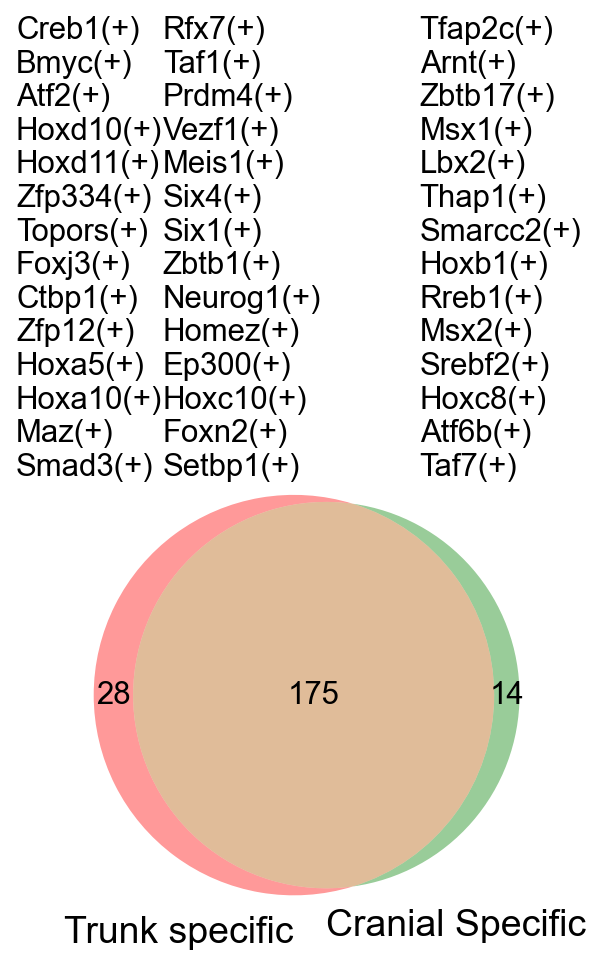

In [11]:
import matplotlib.pyplot as plt
venn2([set(adata.var_names), set(adata_c.var_names)],set_labels = ('Trunk specific', 'Cranial Specific'))
plt.text(-.8,.6,"\n".join(tr[:14]))
plt.text(-.4,.6,"\n".join(tr[14:]))
plt.text(.3,.6,"\n".join(adata_c.var_names[~adata_c.var_names.isin(adata.var_names)]))
plt.savefig("figures/overlap.pdf")

In [12]:
adata_c.var.fit_clusters=adata_c.var.fit_clusters.replace(4,3)

In [13]:
mat=np.zeros((len(adata.var.fit_clusters.unique()),len(adata_c.var.fit_clusters.unique())))
for i in range(5):
    for j in range(4):
        a=adata.var_names[adata.var.fit_clusters==i]
        b=adata_c.var_names[adata_c.var.fit_clusters==j]
        mat[i,j]=len(np.intersect1d(a,b))*2/(len(a)+(len(b)))

In [14]:
mat

array([[0.        , 0.        , 0.70454545, 0.19469027],
       [0.88636364, 0.13953488, 0.        , 0.        ],
       [0.        , 0.04938272, 0.        , 0.66666667],
       [0.        , 0.075     , 0.10126582, 0.28846154],
       [0.05405405, 0.66666667, 0.        , 0.0625    ]])

In [15]:
import numpy as np

<ipython-input-16-f02cbbbb004c>:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mappable, cax=position, orientation="horizontal", aspect=50)


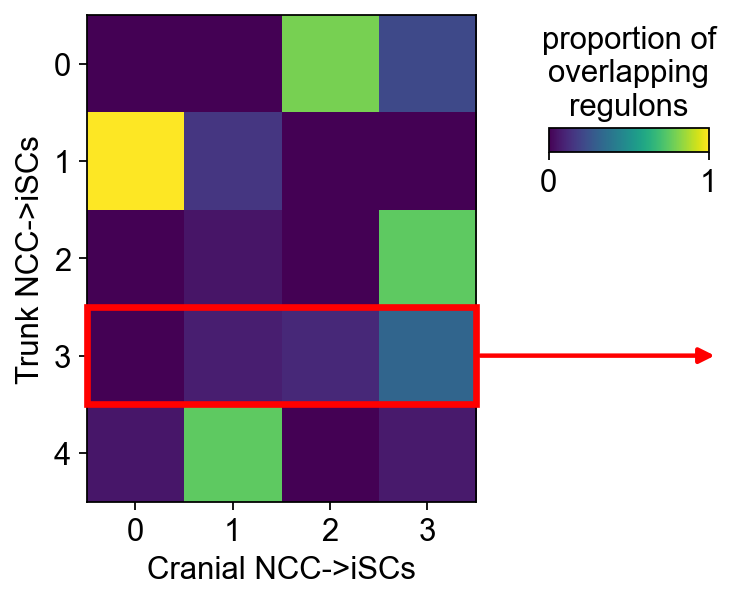

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig,ax=plt.subplots(figsize=(5,4))
m=ax.imshow(mat)
ax.grid(False)
ax.set_xlabel("Cranial NCC->iSCs")
ax.set_ylabel("Trunk NCC->iSCs")

position = inset_axes(
    ax,
    width=1,
    height=0.15,
    bbox_to_anchor=(1.04, 0.6),
    bbox_transform=ax.transAxes,
    loc=3,
    borderpad=2,
)

cmap = "viridis"

mappable = cm.ScalarMappable(cmap=cm.get_cmap(cmap))
cbar = fig.colorbar(mappable, cax=position, orientation="horizontal", aspect=50)
cbar.ax.set_title("proportion of\noverlapping\nregulons", loc="center")


rect = plt.Rectangle((0-.5, 3-.5), 4,1, fill=False,color="red",zorder=100, linewidth=3,clip_on=False)
ax.add_patch(rect)
ax.annotate("",(3.5,3),(6,3),arrowprops=dict(arrowstyle="<|-",color="r",linewidth=2))
plt.savefig("figures/cranial_trunk_props.pdf")

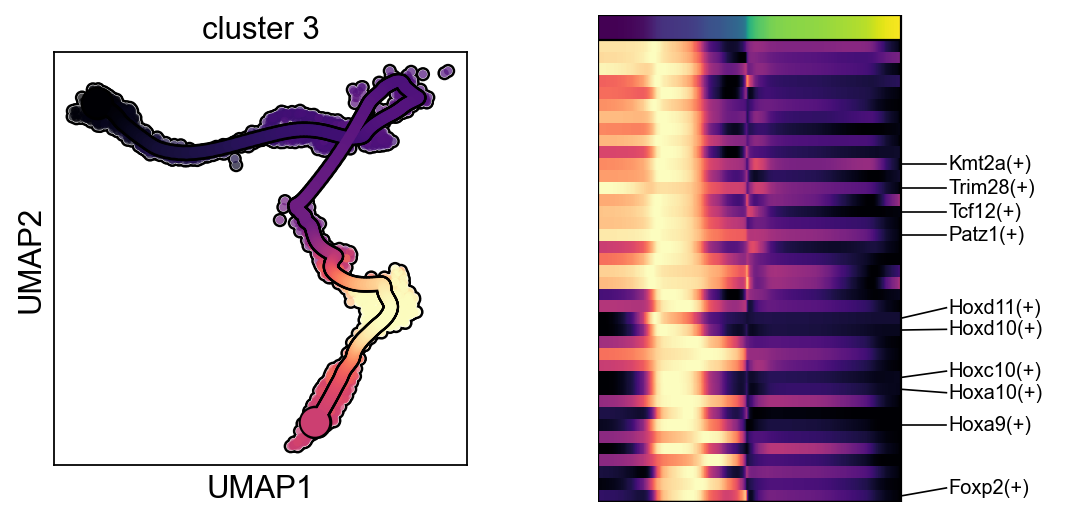

In [17]:
scf.pl.trends(adata,cluster=3,title="cluster 3",feature_cmap="magma",add_outline=True,save="trunk_3.pdf")

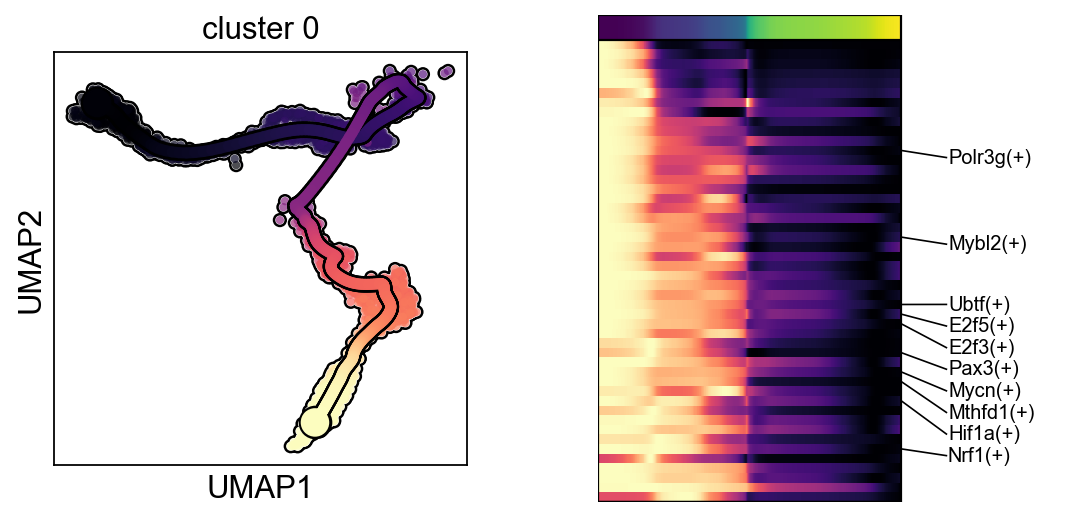

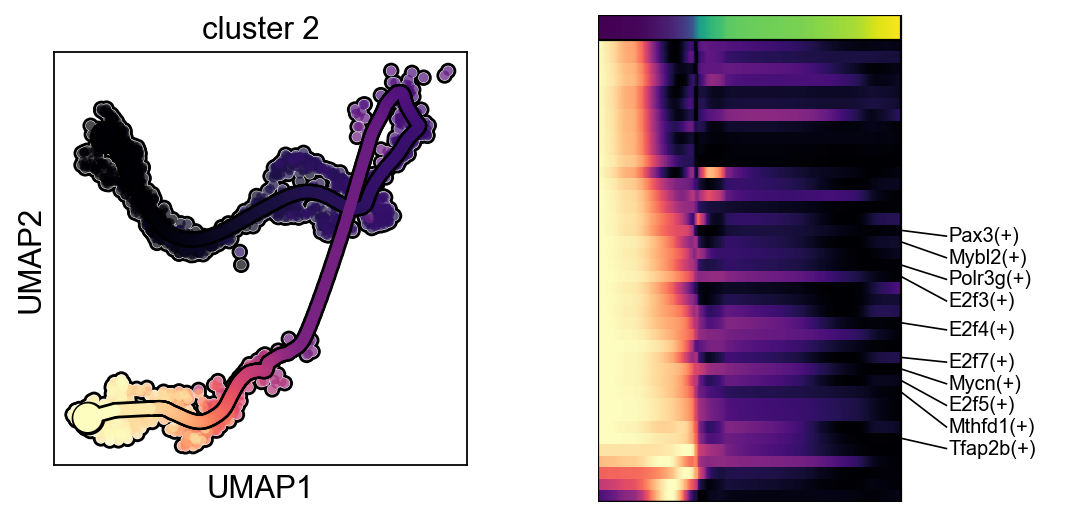

In [18]:
scf.pl.trends(adata,cluster=0,title="cluster 0",feature_cmap="magma",add_outline=True,save="trunk_0A.pdf")
scf.pl.trends(adata_c,cluster=2,title="cluster 2",feature_cmap="magma",add_outline=True,save="cranial_2A.pdf")

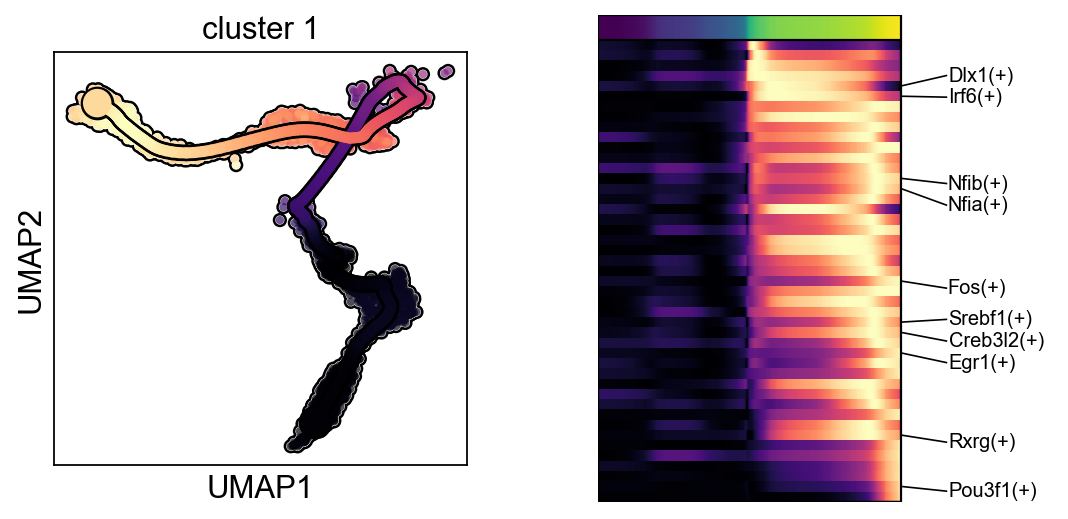

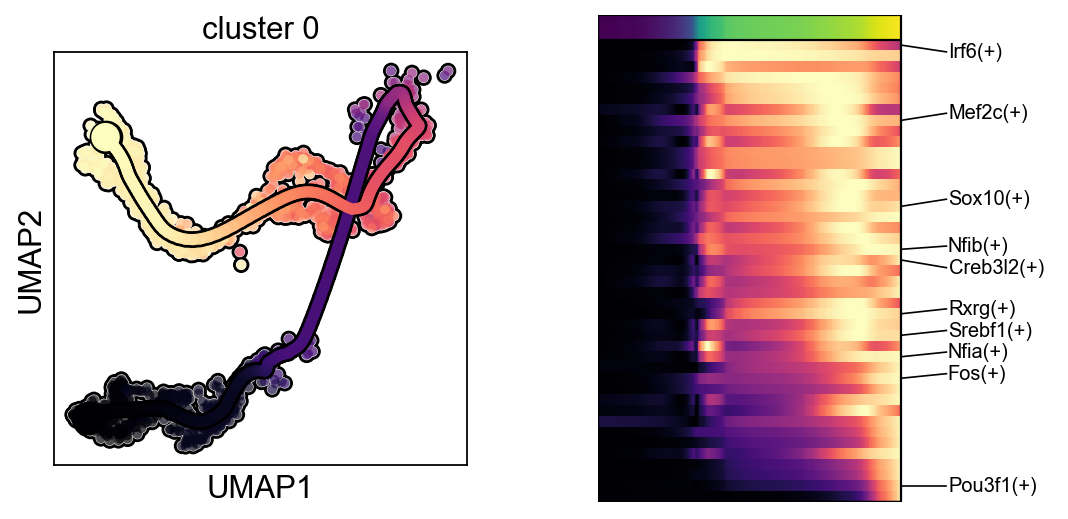

In [19]:
scf.pl.trends(adata,cluster=1,title="cluster 1",feature_cmap="magma",add_outline=True,save="trunk_1B.pdf")
scf.pl.trends(adata_c,cluster=0,title="cluster 0",feature_cmap="magma",add_outline=True,save="cranial_0B.pdf")

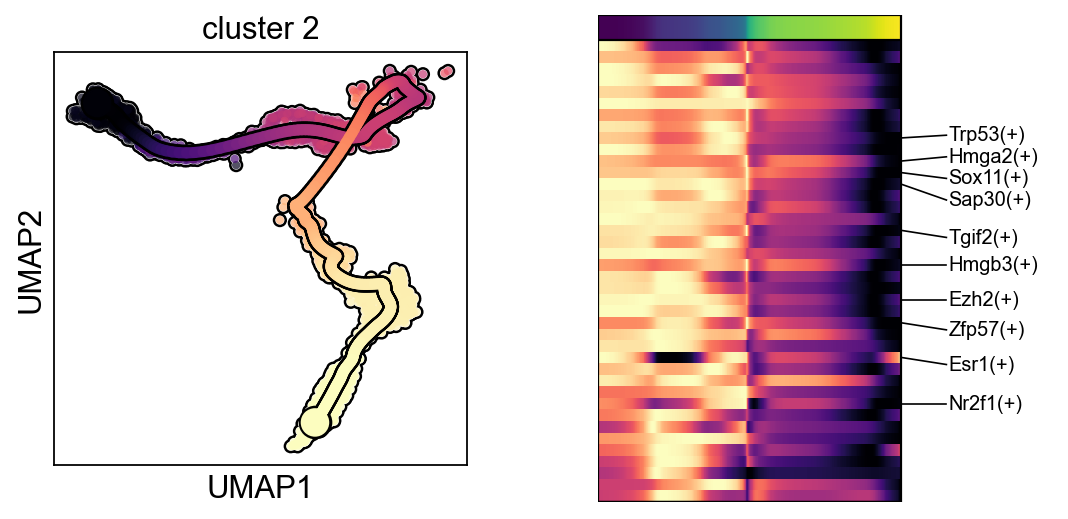

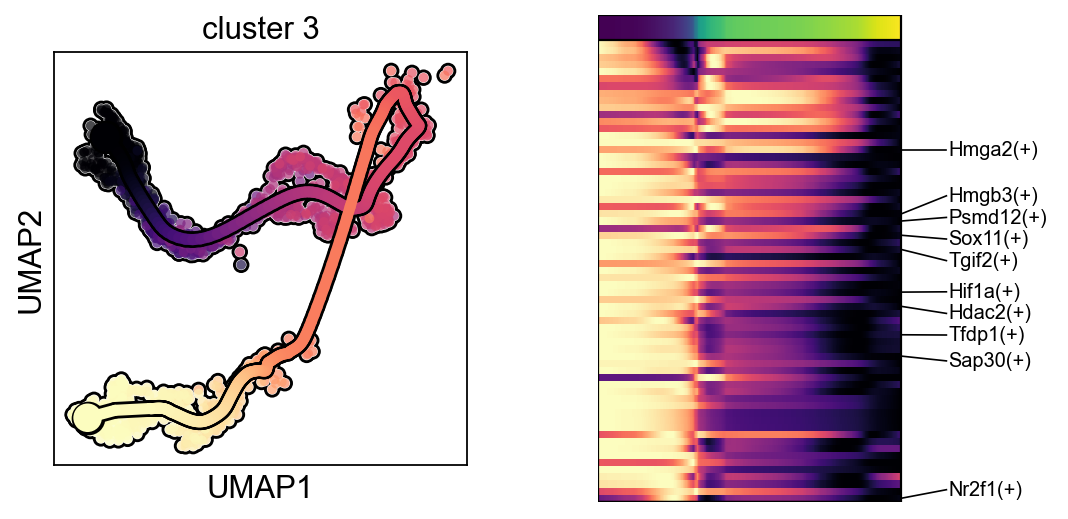

In [20]:
scf.pl.trends(adata,cluster=2,title="cluster 2",feature_cmap="magma",add_outline=True,save="trunk_2C.pdf")
scf.pl.trends(adata_c,cluster=3,title="cluster 3",feature_cmap="magma",add_outline=True,save="cranial_3C.pdf")

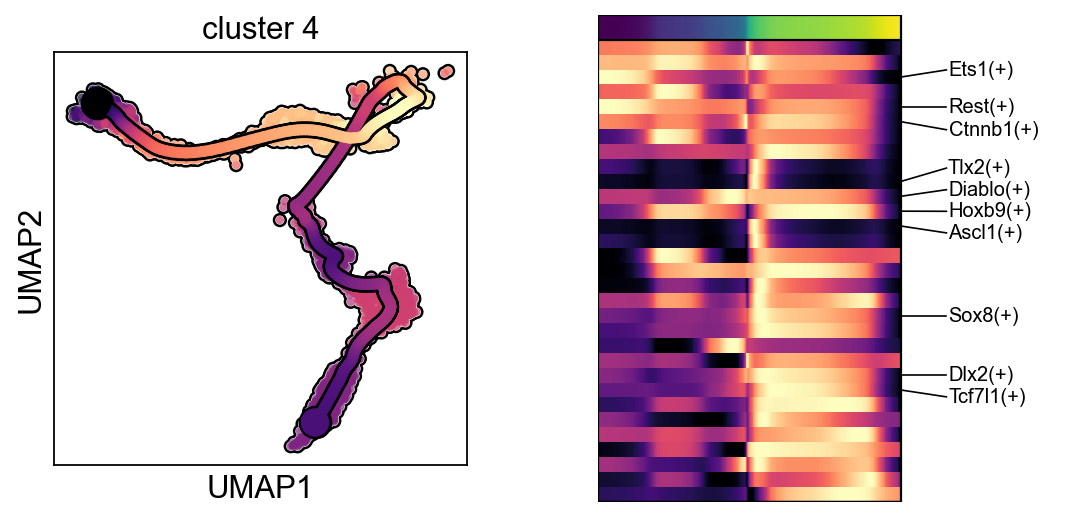

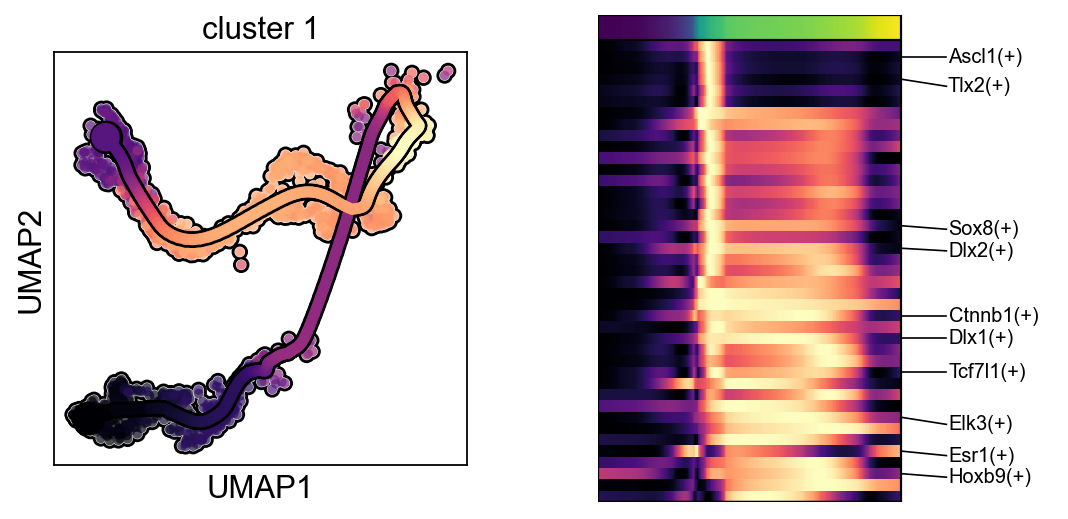

In [21]:
scf.pl.trends(adata,cluster=4,title="cluster 4",feature_cmap="magma",add_outline=True,save="trunk_4A.pdf")
scf.pl.trends(adata_c,cluster=1,title="cluster 1",feature_cmap="magma",add_outline=True,save="cranial_1B.pdf")

In [22]:
fname="Appendix_8"

In [23]:
%%bash -s $fname
cat<<EOF >$1.tex
\documentclass[11pt]{article}
\usepackage[paperheight=297mm,paperwidth=210mm]{geometry}
 \geometry{
 left=5mm,
 right=5mm,
 top=5mm,
 bottom=5mm,
 }

\usepackage[labelfont=bf]{caption}
\usepackage{multirow}
\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\begin{document}
\setmainfont{Arial}

\definecolor{Blue}{RGB}{50, 49, 145}

\noindent
\scriptsize 

\raggedright \begin{minipage}[t]{0.16\textwidth}
\raggedright \textbf{A} \textcolor{Blue}{Regulon overlap}
\includegraphics[width=1\textwidth]{figures/overlap.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{0.31\textwidth}
\raggedright \textbf{B} \textcolor{Blue}{Overlap of regulons between meta-regulons}
\includegraphics[width=1\textwidth]{figures/cranial_trunk_props.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{0.5\textwidth}
\raggedright \textbf{C} \textcolor{Blue}{Meta-regulon specific to Trunk NCC}
\includegraphics[width=1\textwidth]{figures/trendstrunk_3.pdf}
\end{minipage}\hfill

\raggedright \textbf{D} \textcolor{Blue}{Similar meta-regulons between Trunk and Cranial NCC}

\begin{minipage}[t]{0.5\textwidth}
\center Trunk

\includegraphics[width=1\textwidth]{figures/trendstrunk_0A.pdf}
\includegraphics[width=1\textwidth]{figures/trendstrunk_1B.pdf}
\includegraphics[width=1\textwidth]{figures/trendstrunk_2C.pdf}
\includegraphics[width=1\textwidth]{figures/trendstrunk_4A.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{0.5\textwidth}

\center Cranial

\includegraphics[width=1\textwidth]{figures/trendscranial_2A.pdf}
\includegraphics[width=1\textwidth]{figures/trendscranial_0B.pdf}
\includegraphics[width=1\textwidth]{figures/trendscranial_3C.pdf}
\includegraphics[width=1\textwidth]{figures/trendscranial_1B.pdf}
\end{minipage}\hfill


\hfill
\clearpage


EOF

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.tex
convert -flatten -density 300 $1.pdf $1.jpg
identify $1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./suppfig_cranial.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/multirow/multirow.sty)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/t

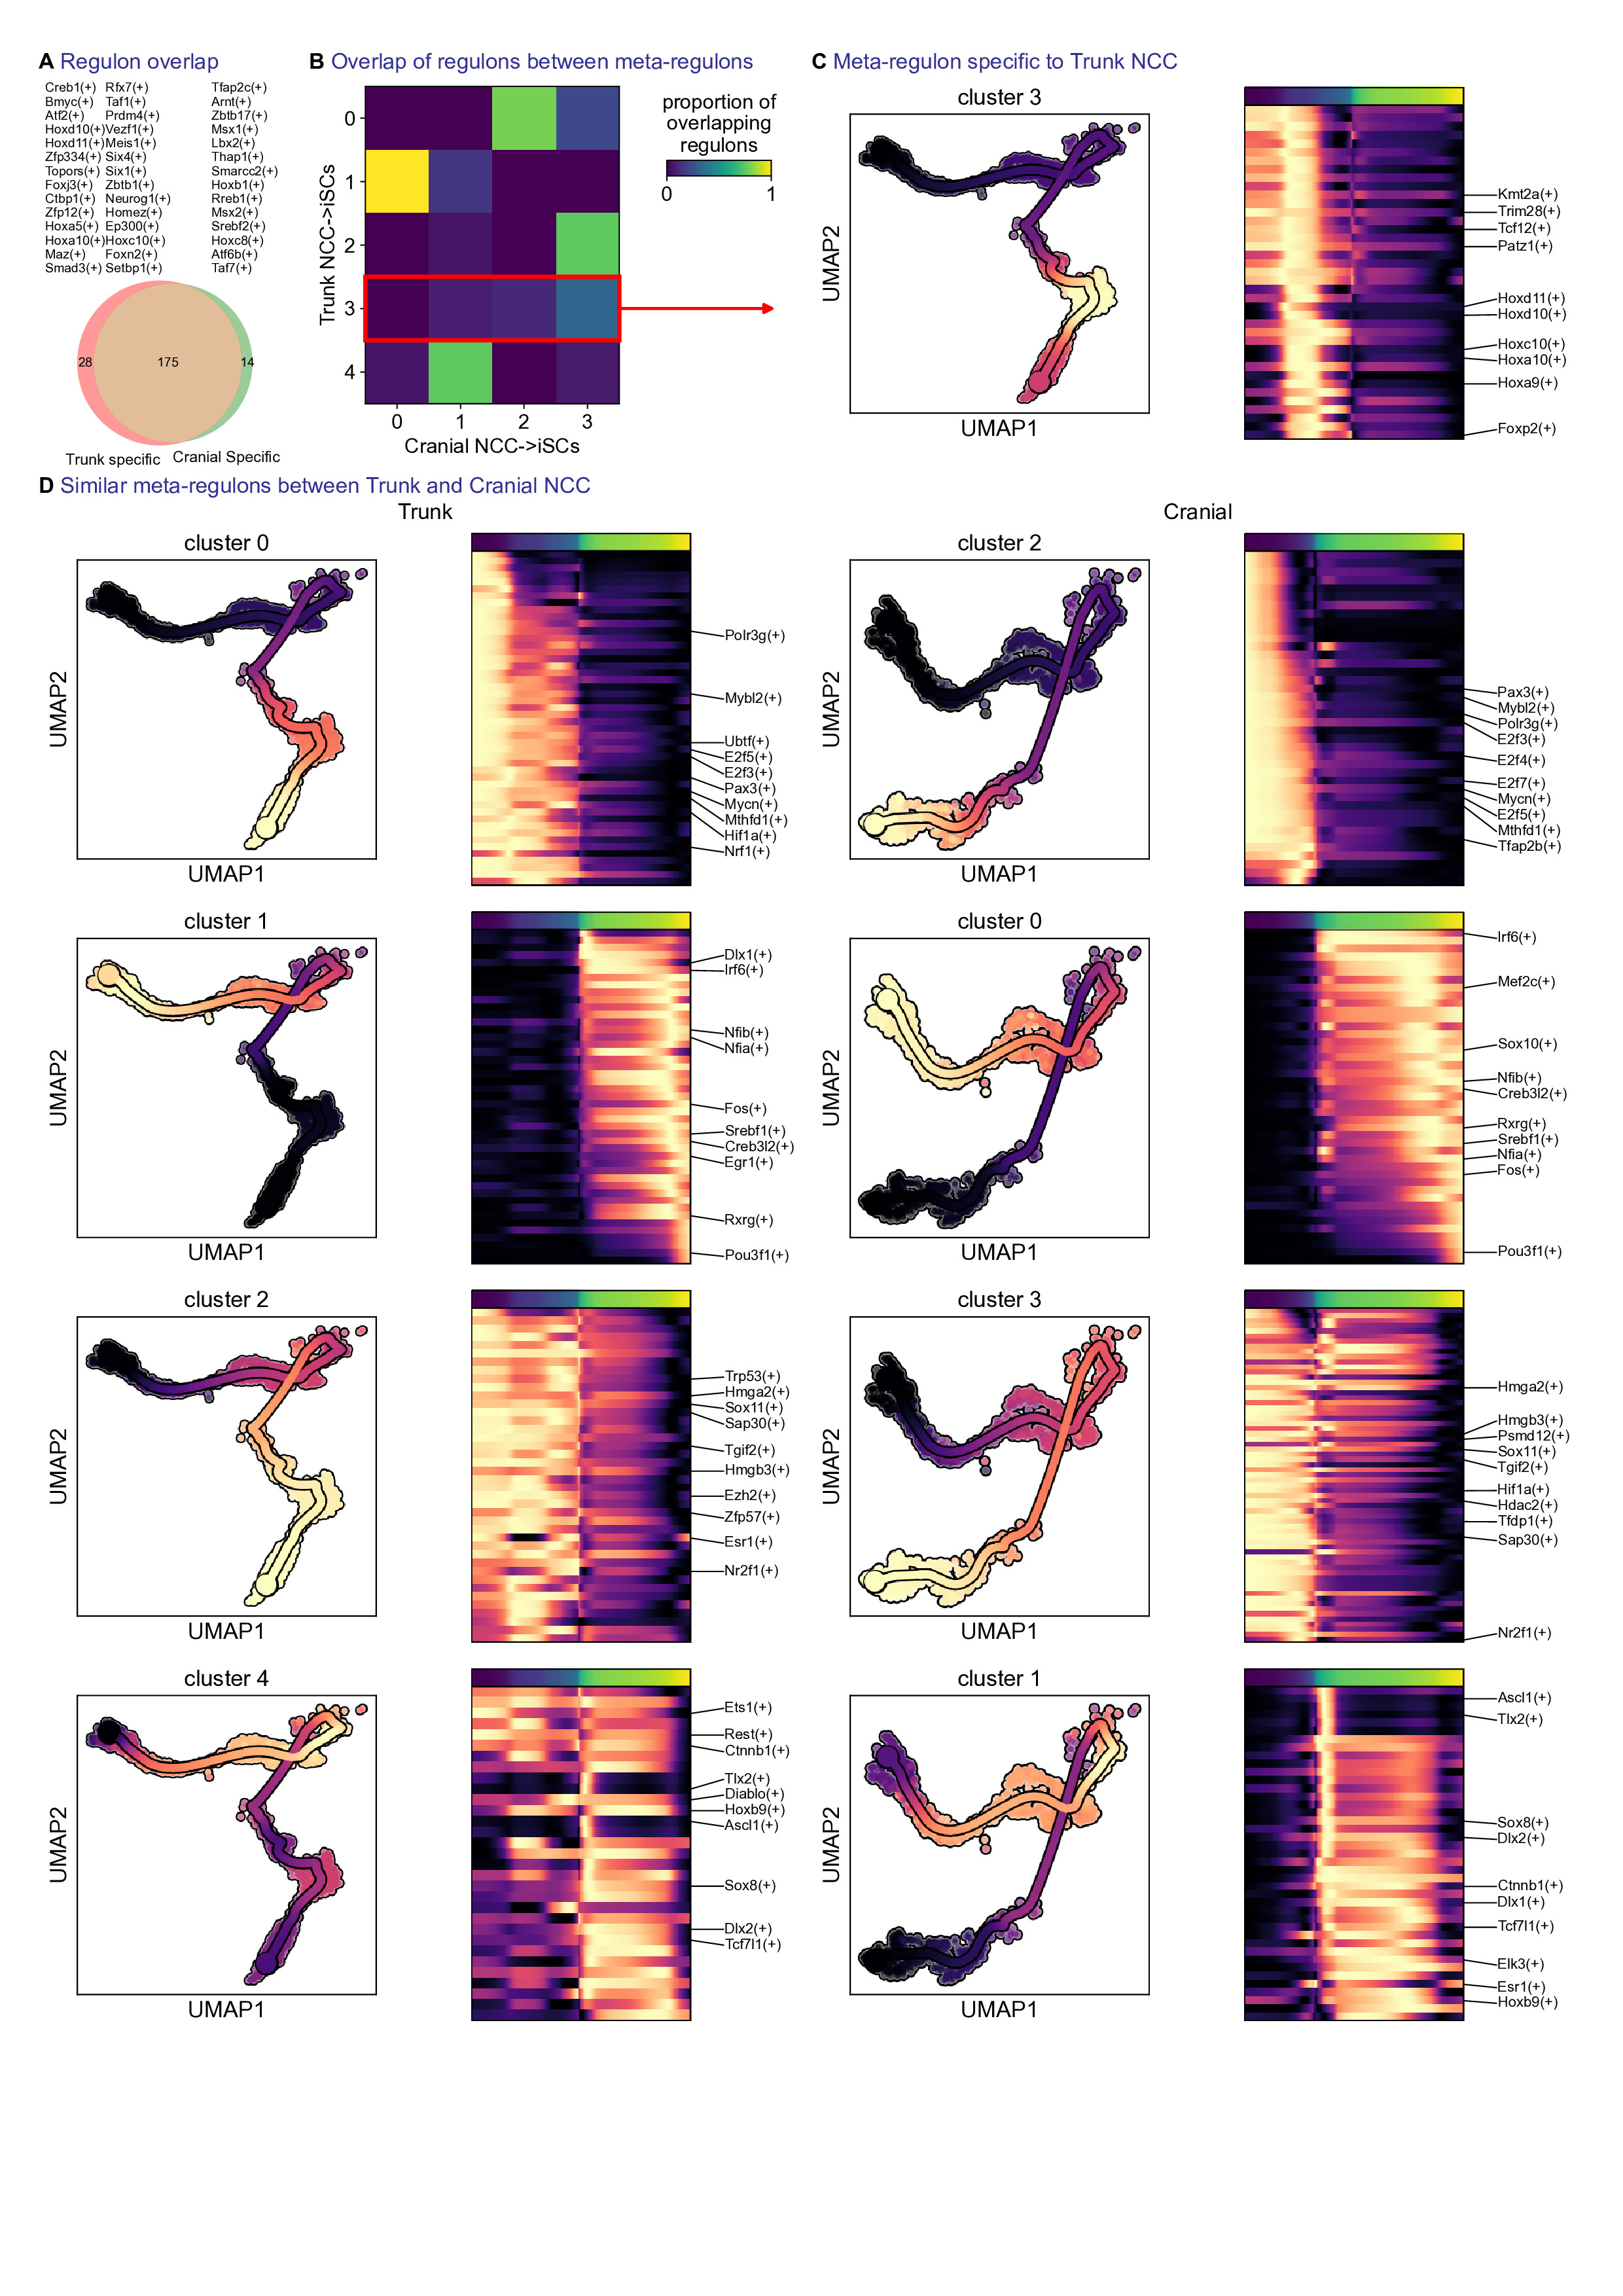

In [24]:
from IPython.display import Image
Image(filename=fname+'.jpg') 